In [1]:
import os
import sys
import importlib
from functools import partial

import h5py
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

sys.path.append('../../../')
import forward_model
importlib.reload(forward_model)
from forward_model.lpt import get_forward_lpt
from forward_model.bias import get_forward_bias
from forward_model.main import get_forward_model
from forward_model.plot_utils import plot_cubes

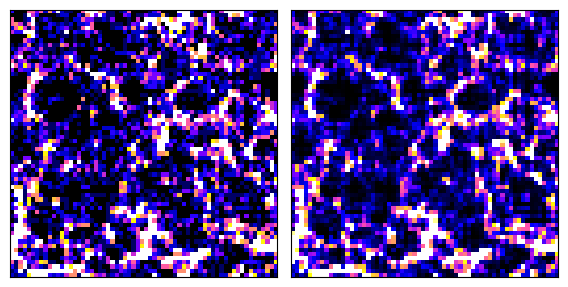

In [8]:
N, L, Z_I, Z_F = 64, 200, 99, 0
N_TR = 1e6

# Make ICS
SEED_INT_REF = 1
key_ref = jax.random.PRNGKey(SEED_INT_REF)
IC_METHOD = "FSK_U"
SHAPE = (N,)*3
u_ref = jax.random.normal(key_ref, shape=SHAPE)

# forward_model
LPT_METHOD = 'LPT1'
BIAS_MODEL = "POWER_LAW"
ALPHA = 1.5
BIAS_PARAMS = {"ALPHA": ALPHA}

argdic = {
    "N": N,
    "L": L,
    "Z_I": Z_I,
    "Z_F": Z_F,
    "LPT_METHOD": LPT_METHOD,
    "PM_METHOD": "CIC",
    "INPUT_ARG": IC_METHOD,
    "MUSCLE": True,
    "MUSCLE_ITERS": "ONE",
    "SC_CORRECTION": True,
    "BIAS_MODEL": BIAS_MODEL,
    "BIAS_PARAMS": BIAS_PARAMS,
    "N_TR": N_TR,
    "SAMPLE": 1,
}

get_tracers_poisson = get_forward_model(argdic)
argdic['SAMPLE'] = False
get_tracers_mean = get_forward_model(argdic)

n_tr_ref = get_tracers_poisson(u_ref)

epsilon = 1e-10
n_tr_mean = get_tracers_mean(u_ref)
n_tr = jnp.where(n_tr_mean == 0.0, epsilon, n_tr_mean)

axis, idx, width = 2, N // 2, 1
fig, ax = plot_cubes(
    [n_tr_ref, n_tr_mean], cmap="gnuplot2", vlim=(0, 10), axis=axis, width=width, idx=idx
)

In [15]:
nll_prime = -jnp.sum(n_tr_ref * jnp.log(n_tr))

nlp_prime = 0.5 * N**3
kinetic_prime = 0.5 * N**3

energy =  nlp_prime + nll_prime + kinetic_prime

# print(f'{nlp_prime + kinetic_prime:0.4e}')
print(f'{energy:0.4e}')
# print(f'{i_prime:0.4e}')


-1.9582e+06
